### Joining Datasets in pandas

`DataFrame == Table` <br />
`Merge == Join`

In [1]:
import pandas as pd

### Import the Datasets and Look at the big Picture

In [2]:
## raed the both two datasets which I want to merge them
presid = pd.read_csv('files/presidents.csv')
prime_min = pd.read_csv('files/prime_ministers.csv')

In [3]:
## Dataset 1
presid.head()

,country,continent,president
0,Egypt,Africa,Abdel Fattah el-Sisi
1,Portugal,Europe,Marcelo Rebelo de Sousa
2,Haiti,North America,Jovenel Moise
3,Uruguay,South America,Jose Mujica
4,Liberia,Africa,Ellen Johnson Sirleaf


In [4]:
## Dataset 2
prime_min.head()

,country,continent,prime_minister
0,Egypt,Africa,Sherif Ismail
1,Portugal,Europe,Antonio Costa
2,Vietnam,Asia,Nguyen Xuan Phuc
3,Haiti,North America,Jack Guy Lafontant
4,India,Asia,Narendra Modi


In [5]:
## Some Information

print('Shape of Dataset 1 --', presid.shape)
print('Shape of Dataset 2 --', prime_min.shape)

Shape of Dataset 1 -- (7, 3)
Shape of Dataset 2 -- (10, 3)


#### I want to join both Tables 
`Dataset 1 --> country`  <br />
`Dataset 2 --> country`

### `Inner Join`
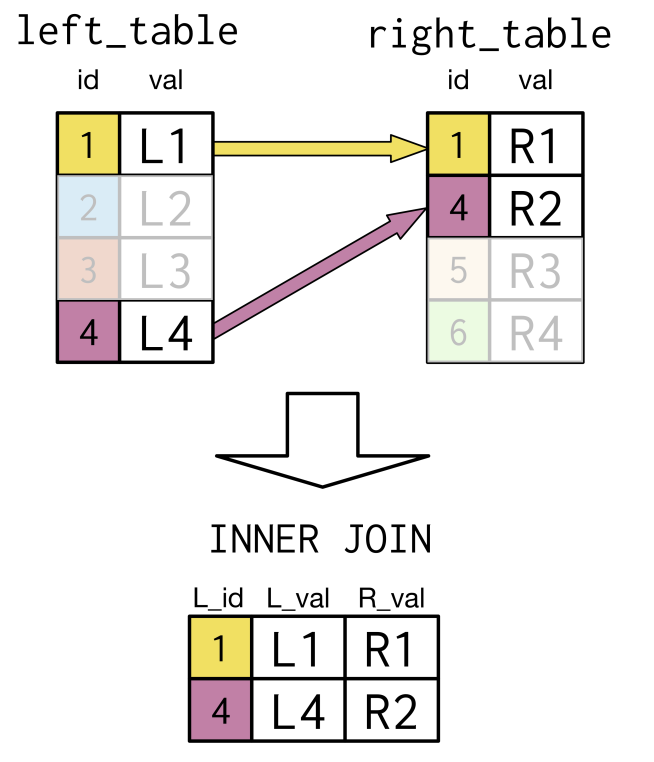

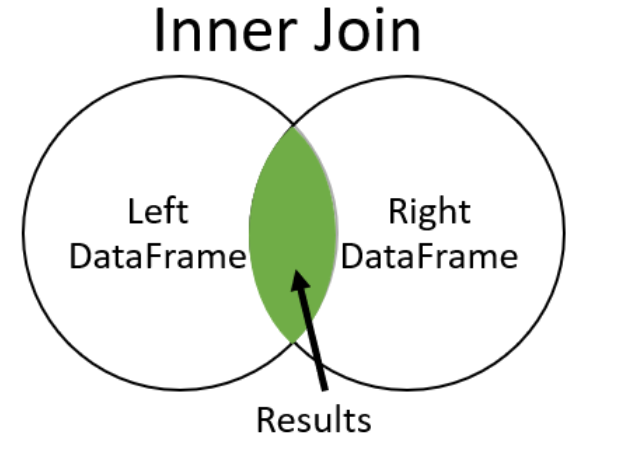

In [6]:
## Let's try Inner Join

## Method 1
df_merged_inner = pd.merge(left=presid, right=prime_min, on='country', how='inner')

## Method 2
df_merged_inner = presid.merge(right=prime_min, on='country', how='inner')  

## try playing with suffixes parameters

### Note if the column name you merge on is different on both columns
## use -- left_on, right_on -- parameters
## Like that --> but here the column you merge on is named the same name (country)
df_merged_inner = presid.merge(right=prime_min, left_on='country', right_on='country', how='inner')

df_merged_inner

,country,continent_x,president,continent_y,prime_minister
0,Egypt,Africa,Abdel Fattah el-Sisi,Africa,Sherif Ismail
1,Portugal,Europe,Marcelo Rebelo de Sousa,Europe,Antonio Costa
2,Haiti,North America,Jovenel Moise,North America,Jack Guy Lafontant
3,Vietnam,Asia,Tran Dai Quang,Asia,Nguyen Xuan Phuc


In [7]:
df_merged_inner.shape

(4, 5)

### `Left Join`
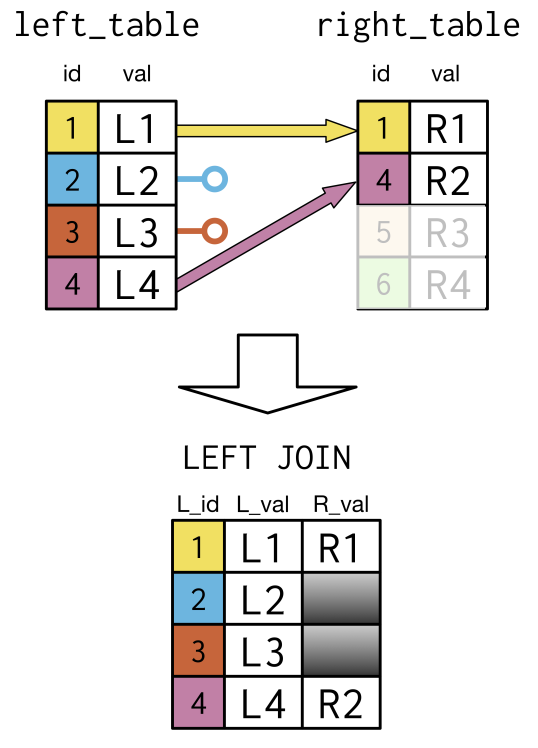

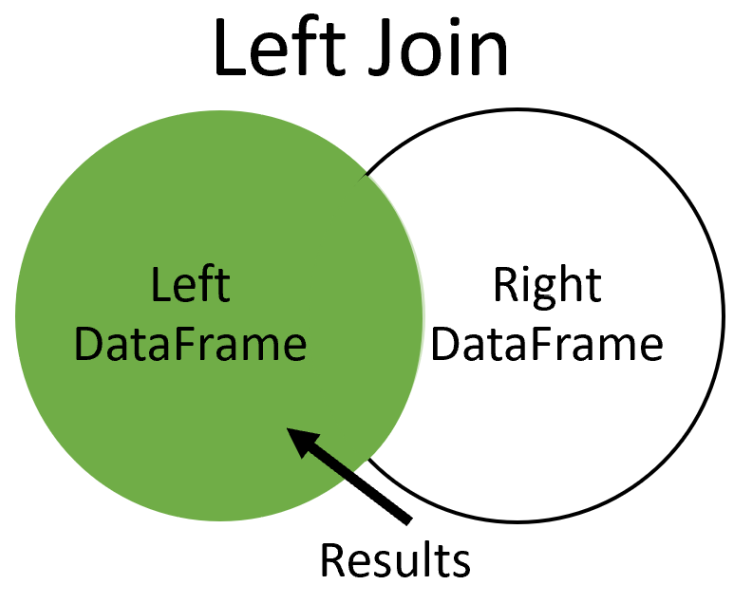

In [8]:
## Let's try left join

## --> make the president Table is the left one
## --> make the prime_minister Table is the left one
df_merged_left = pd.merge(left=presid, right=prime_min, on='country', how='left')

## or

df_merged_left = presid.merge(right=prime_min, on='country', how='left')


df_merged_left

,country,continent_x,president,continent_y,prime_minister
0,Egypt,Africa,Abdel Fattah el-Sisi,Africa,Sherif Ismail
1,Portugal,Europe,Marcelo Rebelo de Sousa,Europe,Antonio Costa
2,Haiti,North America,Jovenel Moise,North America,Jack Guy Lafontant
3,Uruguay,South America,Jose Mujica,NaN,NaN
4,Liberia,Africa,Ellen Johnson Sirleaf,NaN,NaN
5,Chile,South America,Michelle Bachelet,NaN,NaN
6,Vietnam,Asia,Tran Dai Quang,Asia,Nguyen Xuan Phuc


In [9]:
df_merged_left.shape

(7, 5)

### `Right Join`
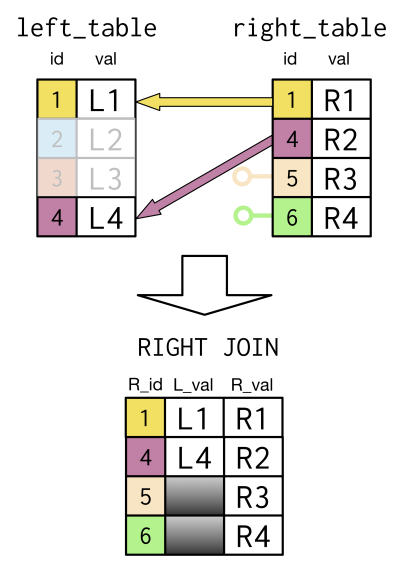

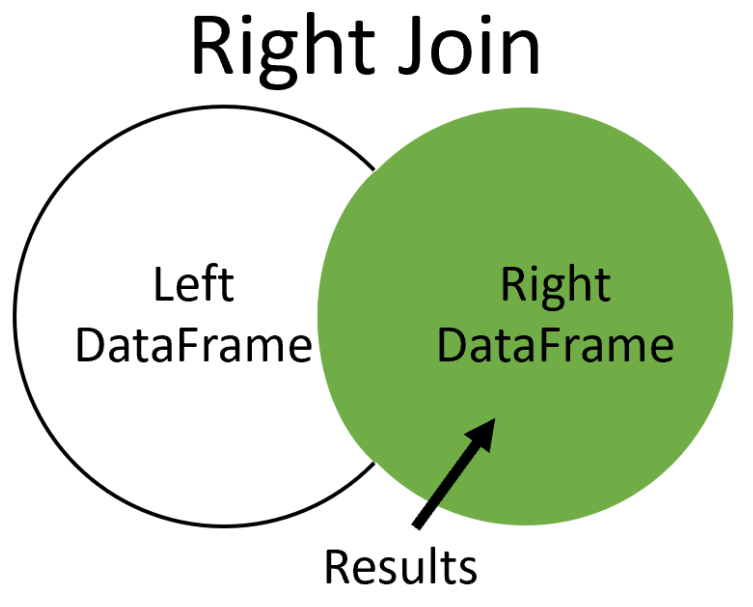

In [10]:
## Right join is the reverse 
## you can swap the table and use left join 
## or make the tables as it is (left is left and right is right ) and use right join

df_merged_right = pd.merge(left=presid, right=prime_min, on='country', how='right')

## or

df_merged_right = presid.merge(right=prime_min, on='country', how='right')


df_merged_right

,country,continent_x,president,continent_y,prime_minister
0,Egypt,Africa,Abdel Fattah el-Sisi,Africa,Sherif Ismail
1,Portugal,Europe,Marcelo Rebelo de Sousa,Europe,Antonio Costa
2,Vietnam,Asia,Tran Dai Quang,Asia,Nguyen Xuan Phuc
3,Haiti,North America,Jovenel Moise,North America,Jack Guy Lafontant
4,India,NaN,NaN,Asia,Narendra Modi
5,Australia,NaN,NaN,Oceania,Malcolm Turnbull
6,Norway,NaN,NaN,Europe,Erna Solberg
7,Brunei,NaN,NaN,Asia,Hassanal Bolkiah
8,Oman,NaN,NaN,Asia,Qaboos bin Said al Said
9,Spain,NaN,NaN,Europe,Mariano Rajoy


In [11]:
df_merged_right.shape

(10, 5)

In [12]:
## you can swap the tables and use left join

pd.merge(left=prime_min, right=presid, on='country', how='left')  ## it is identical to above df

,country,continent_x,prime_minister,continent_y,president
0,Egypt,Africa,Sherif Ismail,Africa,Abdel Fattah el-Sisi
1,Portugal,Europe,Antonio Costa,Europe,Marcelo Rebelo de Sousa
2,Vietnam,Asia,Nguyen Xuan Phuc,Asia,Tran Dai Quang
3,Haiti,North America,Jack Guy Lafontant,North America,Jovenel Moise
4,India,Asia,Narendra Modi,NaN,NaN
5,Australia,Oceania,Malcolm Turnbull,NaN,NaN
6,Norway,Europe,Erna Solberg,NaN,NaN
7,Brunei,Asia,Hassanal Bolkiah,NaN,NaN
8,Oman,Asia,Qaboos bin Said al Said,NaN,NaN
9,Spain,Europe,Mariano Rajoy,NaN,NaN


### `Full (outer) Join`
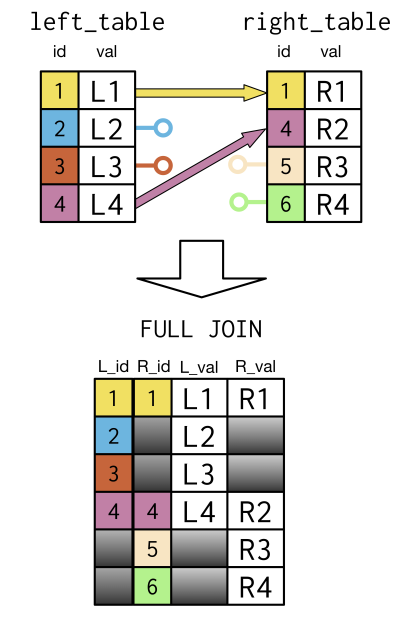

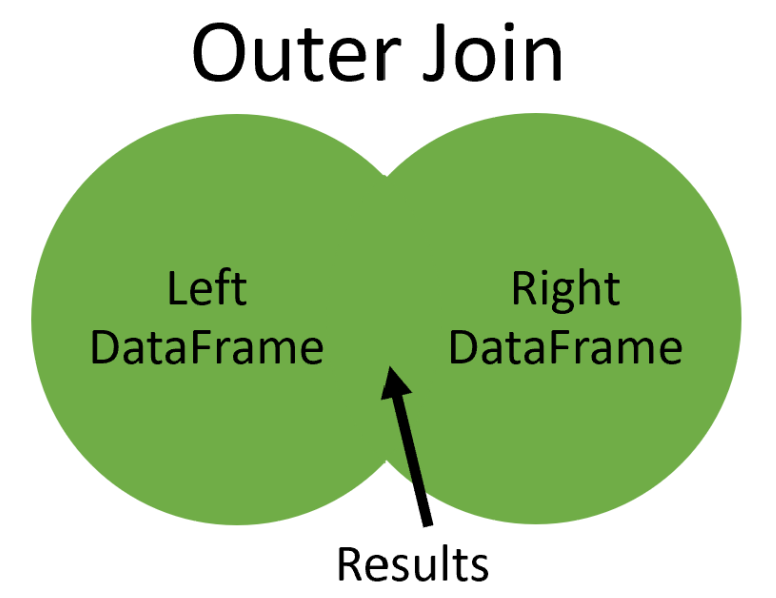

In [13]:
## get the full join == outer
df_merged_outer = pd.merge(left=presid, right=prime_min, on='country', how='outer')

## or

df_merged_outer = presid.merge(right=prime_min, on='country', how='outer')


df_merged_outer

,country,continent_x,president,continent_y,prime_minister
0,Egypt,Africa,Abdel Fattah el-Sisi,Africa,Sherif Ismail
1,Portugal,Europe,Marcelo Rebelo de Sousa,Europe,Antonio Costa
2,Haiti,North America,Jovenel Moise,North America,Jack Guy Lafontant
3,Uruguay,South America,Jose Mujica,NaN,NaN
4,Liberia,Africa,Ellen Johnson Sirleaf,NaN,NaN
5,Chile,South America,Michelle Bachelet,NaN,NaN
6,Vietnam,Asia,Tran Dai Quang,Asia,Nguyen Xuan Phuc
7,India,NaN,NaN,Asia,Narendra Modi
8,Australia,NaN,NaN,Oceania,Malcolm Turnbull
9,Norway,NaN,NaN,Europe,Erna Solberg


## Done!